In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snss
%matplotlib inline

In [2]:
data = pd.read_csv('Ecommerce Customers')

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
x = data[[ 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = data['Yearly Amount Spent']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 101)


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lm = LinearRegression()

In [10]:
lm.fit(X_train, y_train)

LinearRegression()

In [11]:
print(lm.intercept_)

-1047.9327822502382


In [12]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [13]:
pd.DataFrame(lm.coef_, x.columns , columns = ['coef'])

,coef
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [14]:
predictions = lm.predict(X_test)

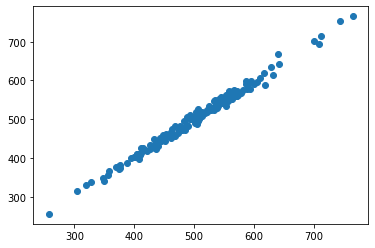

In [15]:
plt.scatter(y_test, predictions)

In [16]:
from sklearn import metrics

In [17]:
metrics.mean_absolute_error(y_test, predictions)

7.228148653430815

In [18]:
metrics.mean_squared_error(y_test, predictions)

79.81305165097429

In [19]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

8.933815066978624

In [21]:
lm.score(X_test, y_test)

0.9890046246741234

In [22]:
comparison = pd.DataFrame({'Predicted Values':predictions,'Actual Values':y_test})

In [25]:
comparison.head()

,Predicted Values,Actual Values
18,456.441861,452.315675
361,402.720053,401.033135
104,409.253154,410.069611
4,591.431034,599.406092
156,590.014373,586.155870


In [26]:
lm.predict([[34.497268, 12.655651, 39.577668, 4.082621 ]])

array([594.4584061])